# Meta label metric

Testing different meta label metric

- precision
- recall
- f1-score
- auc
- kappa

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Custom classes
import sys
sys.path.insert(0,'..')
from meta_learning import evaluator

## Macros

In [7]:
BASE_MODEL = "RandomForestClassifier"
META_MODEL = "LGBMRegressor"
DATASET = "electricity"
META_LABELS = list(evaluator.clf_metrics)
META_LABELS

['precision', 'recall', 'f1-score', 'auc', 'kappa']

## Read data

In [10]:
results_df = pd.DataFrame()

for meta_label in META_LABELS:
    filename = f"metabases/metamodel: {META_MODEL} - basemodel: {BASE_MODEL} - metric: {meta_label} - dataset: {DATASET}.csv"
    df = pd.read_csv(filename)
    results_df[f"{meta_label}_predicted"] = df["predicted"]
    results_df[f"{meta_label}_target"] = df[meta_label]
    results_df[f"{meta_label}_baseline"] = df[f"last_{meta_label}"]

results_df = results_df.dropna()
results_df.head()

,precision_predicted,precision_target,precision_baseline,recall_predicted,recall_target,recall_baseline,f1-score_predicted,f1-score_target,f1-score_baseline,auc_predicted,auc_target,auc_baseline,kappa_predicted,kappa_target,kappa_baseline
97,0.680754,0.347222,0.577465,0.875490,0.892857,1.0,0.754755,0.500000,0.732143,0.732173,0.620040,0.745763,0.391878,0.162198,0.442172
98,0.775692,0.412698,0.577465,0.639142,0.896552,1.0,0.733768,0.565217,0.732143,0.694185,0.687712,0.745763,0.373200,0.278759,0.442172
99,0.788842,0.586957,0.577465,0.747030,0.818182,1.0,0.822455,0.683544,0.732143,0.832755,0.767300,0.745763,0.667018,0.486020,0.442172
100,0.908769,0.896552,0.577465,0.715783,0.866667,1.0,0.846516,0.881356,0.732143,0.853704,0.911905,0.745763,0.723274,0.831731,0.442172
101,0.958052,0.888889,0.577465,0.670388,0.827586,1.0,0.787592,0.857143,0.732143,0.854617,0.892666,0.745763,0.744241,0.801686,0.442172


# Results

### Cumulative gain

Cumulative gain definition: squared_error(baseline) - squared_error(metalearning)
Cumulative gain definition: squared_error(baseline) - squared_error(metalearning)
Cumulative gain definition: squared_error(baseline) - squared_error(metalearning)
Cumulative gain definition: squared_error(baseline) - squared_error(metalearning)
Cumulative gain definition: squared_error(baseline) - squared_error(metalearning)


Text(0.5, 0.98, 'Cumulative gain')

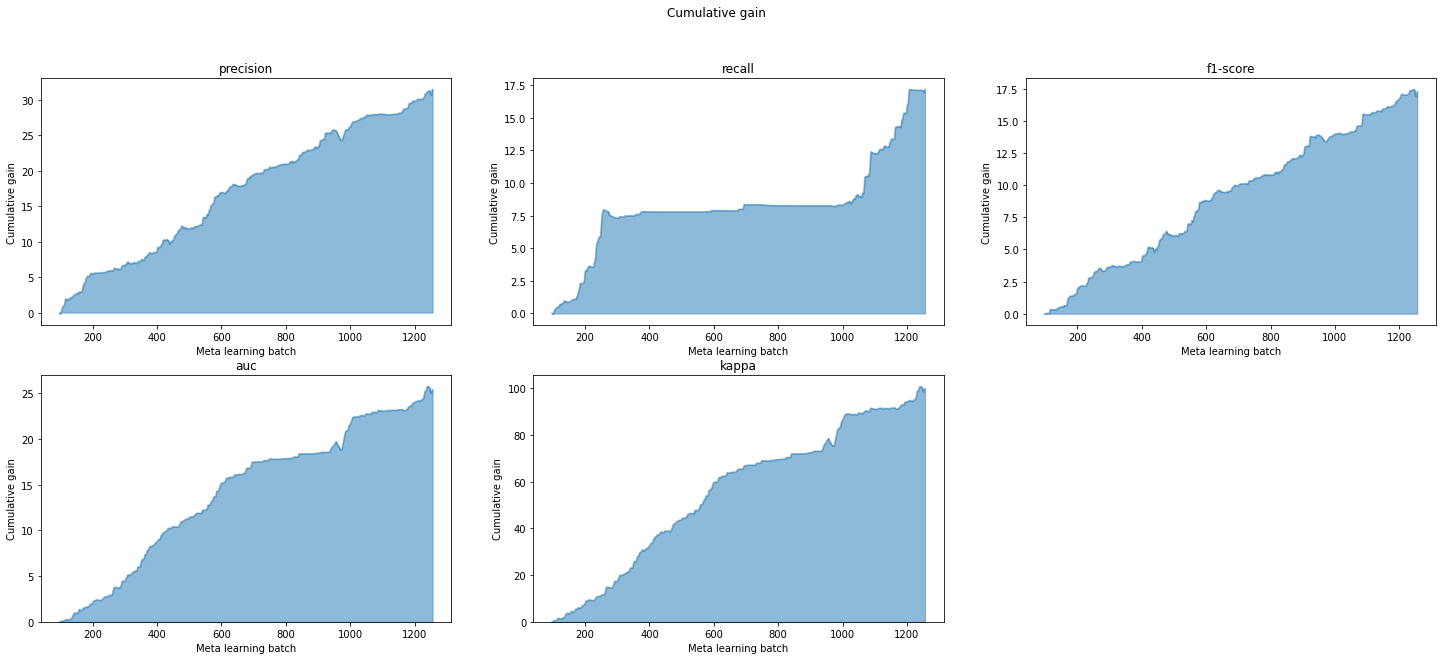

In [11]:
plt.figure(figsize=(25, 10))
for idx, meta_label in enumerate(META_LABELS):
    plt.subplot(2, 3, idx + 1)
    evaluator.cumulative_gain(results_df[f"{meta_label}_target"], results_df[f"{meta_label}_predicted"], results_df[f"{meta_label}_baseline"], title=meta_label, subplot=True)
plt.suptitle("Cumulative gain")

## Error

In [15]:
results = []
for meta_label in META_LABELS:
    mtl_result = evaluator.get_regression_metrics(results_df[f"{meta_label}_target"], results_df[f"{meta_label}_predicted"])
    results.append({**mtl_result, "type": "metalearning", "meta_label": meta_label})
    mtl_result = evaluator.get_regression_metrics(results_df[f"{meta_label}_target"], results_df[f"{meta_label}_baseline"])
    results.append({**mtl_result, "type": "baseline", "meta_label": meta_label})

results = pd.DataFrame(results)
results.head()

,r2,mse,std,type,meta_label
0,0.373737,0.021537,0.146715,metalearning,precision
1,-0.415352,0.048673,0.220619,baseline,precision
2,0.508083,0.007865,0.088685,metalearning,recall
3,-0.416792,0.022653,0.150473,baseline,recall
4,0.078461,0.014250,0.119285,metalearning,f1-score


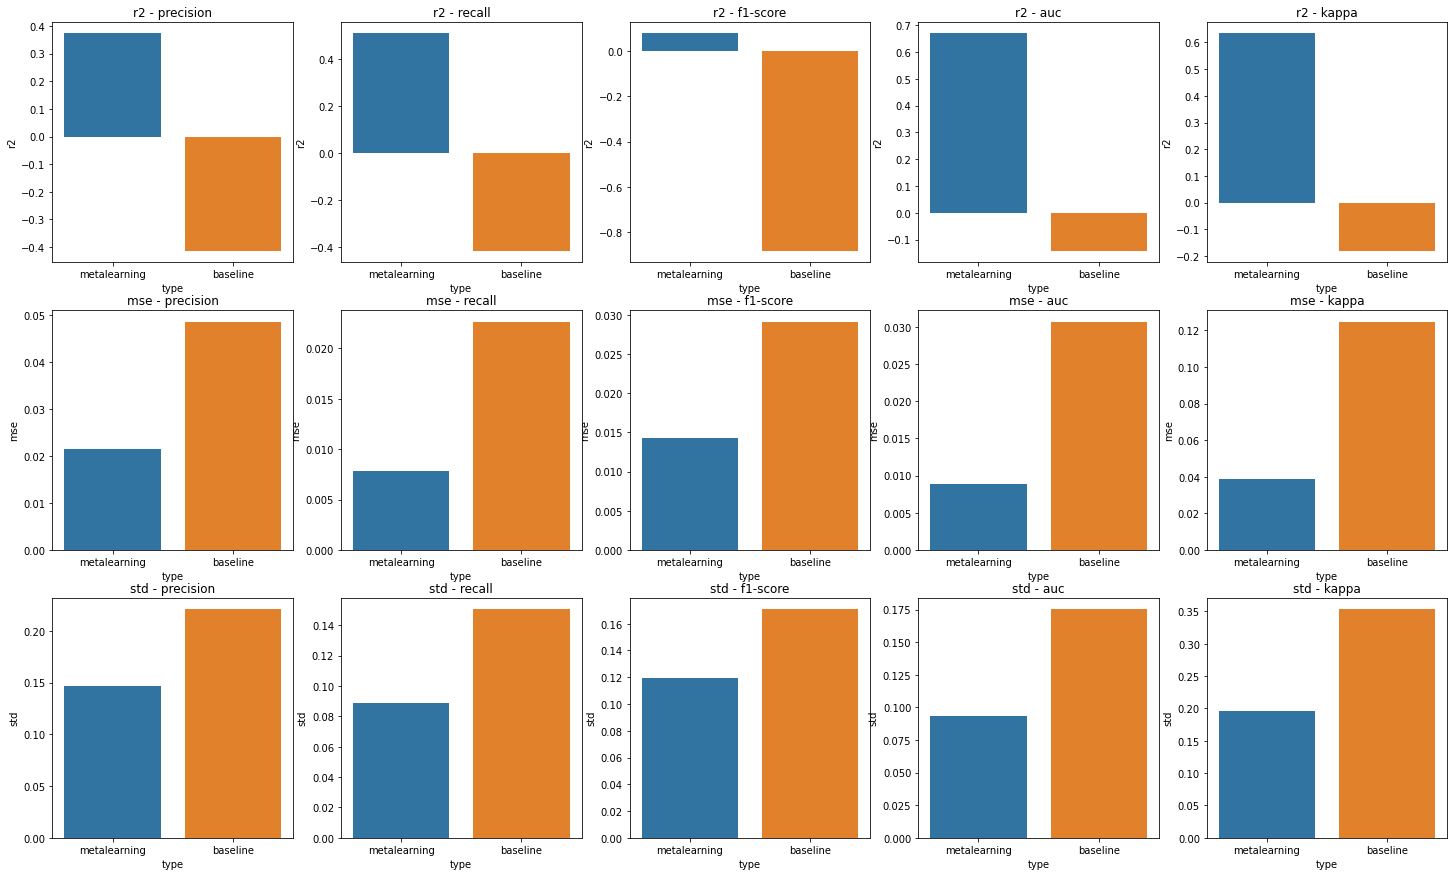

In [19]:
idx = 1
plt.figure(figsize=(25, 15))

for meta_metric in evaluator.reg_metrics:
    for meta_label in META_LABELS:
        plt.subplot(3, 5, idx)
        this_metric = results[results["meta_label"] == meta_label]
        sns.barplot(x="type", y=meta_metric, data=this_metric)
        plt.title(f"{meta_metric} - {meta_label}")
        idx += 1

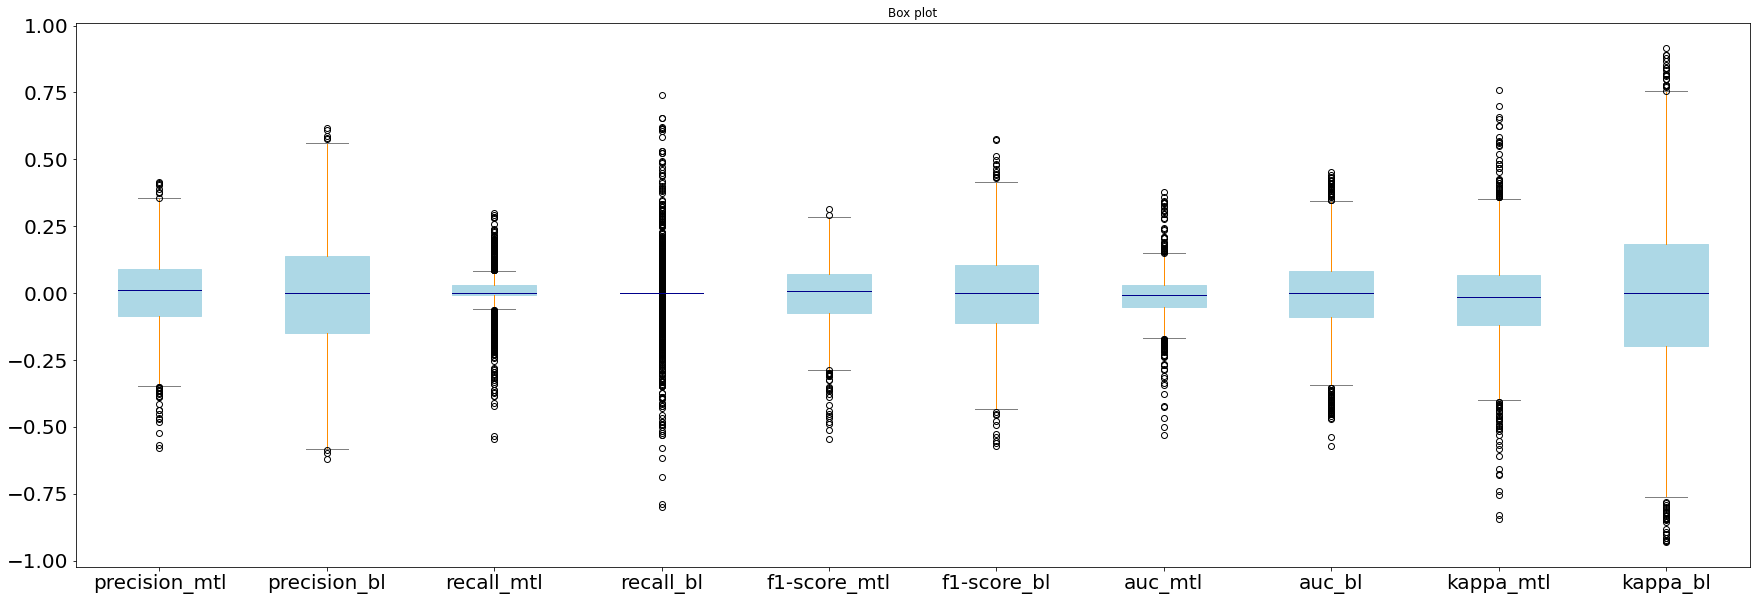

In [23]:
error_df = pd.DataFrame()

for meta_label in META_LABELS:
    error_df[f"{meta_label}_mtl"] = results_df[f"{meta_label}_target"] - results_df[f"{meta_label}_predicted"]
    error_df[f"{meta_label}_bl"] = results_df[f"{meta_label}_target"] - results_df[f"{meta_label}_baseline"]
evaluator.box_plot(error_df, figsize=(30, 10))